In [1]:
import pandas as pd
caminho= "p528_results_Paraleliza.csv"
# Carregar o arquivo CSV existente
df = pd.read_csv(caminho)

In [2]:
pip install cupy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Using cached fastrlock-0.8.2-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_28_x86_64.whl (51 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [63 lines of output]
      Generating cache key from header files...
      Cache key (1610 files matching /tmp/pip-install-xp38c7mi/cupy_fc5751da3c0e4acf9c4a6345379f5ece/cupy/_core/include/**): 94b82b4af4f366204d44f486688af23003e285c1
      Clearing directory: /tmp/pip-install-xp38c7mi/cupy_fc5751da3c0e4acf9c4a6345379f5ece/cupy/.data
      
      -------- Configuring Module: cuda --------
      /tmp/tmpl_vkv0tk/a.cpp:1:10: fatal error: cublas_v2.h: No such file or directory
          1 | #include <cublas_v2.h>
            |          ^~~~~~

In [3]:
import pandas as pd

# Carregar o CSV original
#df = pd.read_csv('')

# Agrupar pelos valores únicos de 'f__mhz' e 'T_pol'
grupos = df.groupby(['f__mhz', 'p'])

# Criar arquivos CSV separados para cada combinação de 'f__mhz' e 'T_pol'
for (f_mhz, t_pol), group in grupos:
    nome_arquivo = f'{f_mhz} MHz - Lb({t_pol/100})_P528.csv'
   # 1,200 MHz - Lb(0.95)_P528.csv
    group.to_csv(nome_arquivo, index=False)

print("Arquivos CSV separados foram criados com sucesso!")


Arquivos CSV separados foram criados com sucesso!


In [6]:
import os
import re

# Defina o caminho para o diretório onde os arquivos estão localizados
directory = r"/home/raulm/anatel/P528py/scalar/Data Table Gen"

# Percorra os arquivos no diretório
for filename in os.listdir(directory):
    # Use uma expressão regular para encontrar a parte da frequência
    match = re.search(r'(\d+)\s*MHz', filename)
    
    if match:
        frequency = match.group(1)
        
        # Se a frequência tiver 4 dígitos ou mais, formate com vírgulas
        if len(frequency) >= 4:
            formatted_frequency = '{:,}'.format(int(frequency)).replace(',', '.')
            new_filename = filename.replace(frequency, formatted_frequency)
            
            # Crie os caminhos completos para os arquivos antigo e novo
            old_file = os.path.join(directory, filename)
            new_file = os.path.join(directory, new_filename)
            
            # Renomeie o arquivo
            os.rename(old_file, new_file)
            print(f'Renomeado: "{filename}" para "{new_filename}"')


Renomeado: "9400 MHz - Lb(0.05)_P528.csv" para "9.400 MHz - Lb(0.05)_P528.csv"
Renomeado: "1200 MHz - Lb(0.01)_P528.csv" para "1.200 MHz - Lb(0.01)_P528.csv"
Renomeado: "9400 MHz - Lb(0.5)_P528.csv" para "9.400 MHz - Lb(0.5)_P528.csv"
Renomeado: "30000 MHz - Lb(0.05)_P528.csv" para "30.000 MHz - Lb(0.05)_P528.csv"
Renomeado: "15500 MHz - Lb(0.95)_P528.csv" para "15.500 MHz - Lb(0.95)_P528.csv"
Renomeado: "2400 MHz - Lb(0.5)_P528.csv" para "2.400 MHz - Lb(0.5)_P528.csv"
Renomeado: "9400 MHz - Lb(0.95)_P528.csv" para "9.400 MHz - Lb(0.95)_P528.csv"
Renomeado: "2400 MHz - Lb(0.05)_P528.csv" para "2.400 MHz - Lb(0.05)_P528.csv"
Renomeado: "2400 MHz - Lb(0.01)_P528.csv" para "2.400 MHz - Lb(0.01)_P528.csv"
Renomeado: "1200 MHz - Lb(0.05)_P528.csv" para "1.200 MHz - Lb(0.05)_P528.csv"
Renomeado: "30000 MHz - Lb(0.5)_P528.csv" para "30.000 MHz - Lb(0.5)_P528.csv"
Renomeado: "2400 MHz - Lb(0.1)_P528.csv" para "2.400 MHz - Lb(0.1)_P528.csv"
Renomeado: "15500 MHz - Lb(0.05)_P528.csv" para "15.50

In [9]:
a="/home/raulm/anatel/P528py/scalar/Data Table Gen/600 MHz - Lb(0.05)_P528.csv"
df= pd.read_csv(a)

In [10]:
import pandas as pd

# Lista das combinações desejadas de h1 e h2
h1_values = [1.5, 15, 30, 60, 1000, 10000, 20000]
h2_values = [1000, 10000, 20000]

# Criação das colunas dinamicamente
columns = ["D (km)"] + [f"h1={h1}_h2={h2}" for h1 in h1_values for h2 in h2_values]

# Criação do DataFrame vazio com as colunas definidas
result = pd.DataFrame(columns=columns)



# Agrupar e preencher o DataFrame resultante
for d in df['d__km'].unique():
    # Criação de um dicionário para cada linha
    row = {'D (km)': d}

    for h1 in h1_values:
        for h2 in h2_values:
            col_name = f"h1={h1}_h2={h2}"
            # Filtrar para encontrar a combinação de d, h1 e h2
            match = df[(df['d__km'] == d) & (df['h_1__meter'] == h1) & (df['h_2__meter'] == h2)]

            if not match.empty:
                # Se houver correspondência, adicionar a Perda_total_dB
                row[col_name] = match['Perda_total_dB'].values[0]
            else:
                # Se não houver correspondência, preencher com 0.0
                row[col_name] = 0.0

    # Adicionar a linha ao DataFrame de resultados usando pd.concat()
    result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

# Mostrar o DataFrame final
print(result)


/tmp/ipykernel_1035996/1508691704.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


     D (km)  h1=1.5_h2=1000  h1=1.5_h2=10000  h1=1.5_h2=20000  h1=15_h2=1000  \
0         0       83.848061       103.878351       109.902743      83.729774   
1         1       86.408673       103.855274       109.871196      86.390629   
2         2       90.067588       103.902424       109.856463      90.063910   
3         3       92.939279       104.019834       109.859368      92.936604   
4         4       95.163330       104.202948       109.880115      95.164626   
...     ...             ...              ...              ...            ...   
996     996      243.724978       222.538817       209.956043     236.775936   
997     997      243.807333       222.625297       210.048721     236.851173   
998     998      243.889682       222.711806       210.141334     236.926404   
999     999      243.972068       222.798389       210.233791     237.001675   
1000   1000      244.054402       222.884951       210.326182     237.076896   

      h1=15_h2=10000  h1=15_h2=20000  h

In [16]:
import pandas as pd
import os

# Lista das combinações desejadas de h1 e h2
h1_values = [1.5, 15, 30, 60, 1000, 10000, 20000]
h2_values = [1000, 10000, 20000]

# Criação das colunas dinamicamente
columns = ["D (km)"] + [f"h1={h1}_h2={h2}" for h1 in h1_values for h2 in h2_values]

# Caminho da pasta contendo os arquivos CSV
pasta_arquivos = '/home/raulm/anatel/P528py/scalar/Data Table Gen'

# Percorrer todos os arquivos CSV na pasta
for filename in os.listdir(pasta_arquivos):
    if filename.endswith('.csv'):
        # Caminho completo do arquivo
        file_path = os.path.join(pasta_arquivos, filename)
        
        # Carregar o DataFrame a partir do CSV
        df = pd.read_csv(file_path)
        
        # Criação do DataFrame vazio para os resultados
        result = pd.DataFrame(columns=columns)
        
        # Agrupar e preencher o DataFrame resultante
        for d in df['d__km'].unique():
            # Criação de um dicionário para cada linha
            row = {'D (km)': d}

            for h1 in h1_values:
                for h2 in h2_values:
                    col_name = f"h1={h1}_h2={h2}"
                    # Filtrar para encontrar a combinação de d, h1 e h2
                    match = df[(df['d__km'] == d) & (df['h_1__meter'] == h1) & (df['h_2__meter'] == h2)]

                    if not match.empty:
                        # Se houver correspondência, adicionar a Perda_total_dB
                        row[col_name] = match['Perda_total_dB'].values[0]
                    else:
                        # Se não houver correspondência, preencher com 0.0
                        row[col_name] = 0.0

            # Adicionar a linha ao DataFrame de resultados usando pd.concat()
            result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

        # Salvar o DataFrame resultante no mesmo caminho, sobrescrevendo o arquivo original
        result.to_csv(file_path, index=False)
        
        print(f"Arquivo processado e salvo: {filename}")

print("Todos os arquivos foram processados.")


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 5.100 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 600 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 2.400 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 100 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 30.000 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 125 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 100 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 5.100 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 125 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 300 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 15.500 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: p528_results_Paraleliza.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 9.400 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 2.400 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 100 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 2.400 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 300 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 5.100 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 2.400 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 100 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 9.400 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 9.400 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 600 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 5.100 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 600 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 1.200 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 1.200 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 30.000 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 30.000 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 125 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 30.000 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 300 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 15.500 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 125 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 15.500 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 5.100 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 300 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 600 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 2.400 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 9.400 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 15.500 MHz - Lb(0.95)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 100 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 125 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 300 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 30.000 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 15.500 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 1.200 MHz - Lb(0.05)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 9.400 MHz - Lb(0.01)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 1.200 MHz - Lb(0.5)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 1.200 MHz - Lb(0.1)_P528.csv


/tmp/ipykernel_1035996/4265846188.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


Arquivo processado e salvo: 600 MHz - Lb(0.1)_P528.csv
Todos os arquivos foram processados.


In [17]:
a="/home/raulm/anatel/P528py/Data Tables/1,200 MHz - Lb(0.01)_P528.csv"
df= pd.read_csv(a)

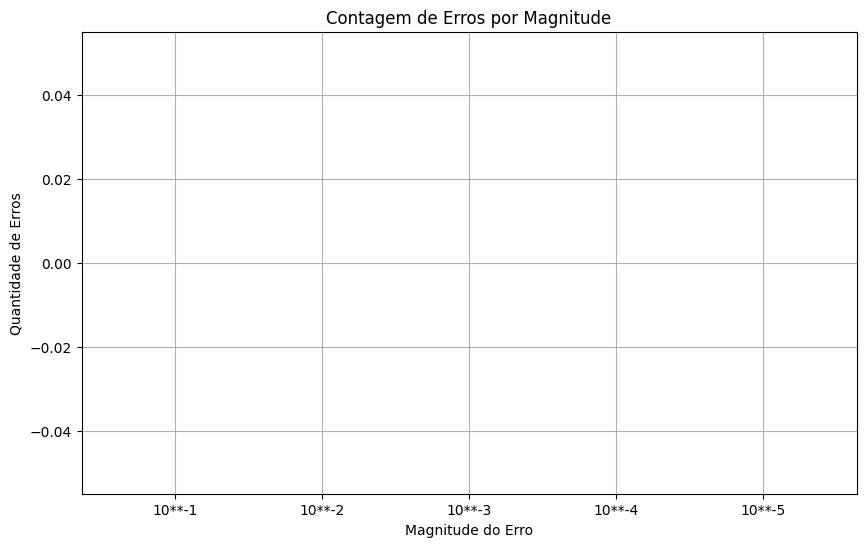

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Caminhos das pastas
pasta_gerar = "/home/raulm/anatel/P528py/scalar/Data Table Gen"
pasta_data_tables = '/home/raulm/anatel/p528_article/Data Tables'

# Dicionário para armazenar os contadores de erros por magnitude
contagem_erros = {
    '10**-1': 0,
    '10**-2': 0,
    '10**-3': 0,
    '10**-4': 0,
    '10**-5': 0,
}

# Função para calcular a taxa de erro e classificar por magnitude
def calcular_taxa_erro(df1, df2):
    for coluna in df1.columns:
        if coluna in df2.columns:
            erro = (df1[coluna] - df2[coluna]).abs()
            porcentagem_erro = (erro / df2[coluna]).dropna() * 100

            # Classificar os erros por magnitude
            for erro in porcentagem_erro:
                if erro >= 10**-1:
                    contagem_erros['10**-1'] += 1
                elif erro >= 10**-2:
                    contagem_erros['10**-2'] += 1
                elif erro >= 10**-3:
                    contagem_erros['10**-3'] += 1
                elif erro >= 10**-4:
                    contagem_erros['10**-4'] += 1
                elif erro >= 10**-5:
                    contagem_erros['10**-5'] += 1

# Comparar os arquivos CSV
for arquivo in os.listdir(pasta_gerar):
    if arquivo.endswith('.csv'):
        caminho_gerar = os.path.join(pasta_gerar, arquivo)
        caminho_data_tables = os.path.join(pasta_data_tables, arquivo)

        if os.path.exists(caminho_data_tables):
            # Carregar os arquivos CSV, desconsiderando a primeira linha dos arquivos de "gerar" e a última linha dos arquivos de "Data Tables"
            df_gerar = pd.read_csv(caminho_gerar).iloc[1:].reset_index(drop=True)  # Ignora a primeira linha e reseta o índice
            df_data_tables = pd.read_csv(caminho_data_tables).reset_index(drop=True)  # Ignora a última linha

            # Calcular a taxa de erro
            calcular_taxa_erro(df_gerar, df_data_tables)

# Preparar dados para o gráfico
magnitudes = list(contagem_erros.keys())
valores = list(contagem_erros.values())

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(magnitudes, valores, color='blue')
plt.title('Contagem de Erros por Magnitude')
plt.xlabel('Magnitude do Erro')
plt.ylabel('Quantidade de Erros')
plt.grid(True)
plt.show()

   D (km)  h1=1.5_h2=1000  h1=1.5_h2=10000  h1=1.5_h2=20000  h1=15_h2=1000  \
0       0           111.9            119.5            119.4          119.3   
1       1           114.9            123.6            123.4          123.2   
2       2           118.9            128.5            128.4          128.3   
3       3           121.9            131.8            131.8          131.8   
4       4           124.2            134.3            134.3          134.3   

   h1=15_h2=10000  h1=15_h2=20000  h1=30_h2=1000  h1=30_h2=10000  \
0           119.0             0.0          139.6           139.6   
1           122.9           115.3          139.6           139.5   
2           128.2           124.3          139.7           139.7   
3           131.7           129.6          139.9           139.9   
4           134.2           132.9          140.3           140.3   

   h1=30_h2=20000  ...  h1=60_h2=20000  h1=1000_h2=1000  h1=1000_h2=10000  \
0           139.5  ...             0.0       

<Figure size 1500x800 with 0 Axes>

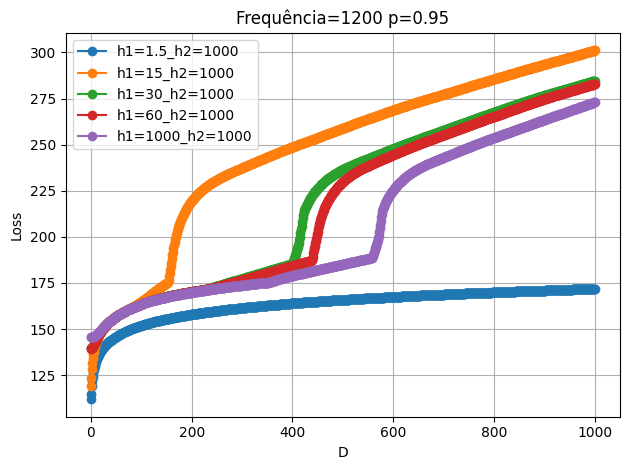

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import os

# Caminho da pasta gerar e arquivo específico
#pasta_gerar = 'arquivos'

caminho_csv = "/home/raulm/anatel/P528py/Data Tables/9,400 MHz - Lb(0.95)_P528 copy.csv"
#caminho_csv = os.path.join(pasta_gerar, arquivo_csv)

# Carregar o arquivo CSV
df = pd.read_csv(caminho_csv)

print(df.head())

# Selecionar as colunas específicas
colunas_selecionadas = ['h1=1.5_h2=1000', 'h1=15_h2=1000', 'h1=30_h2=1000', 'h1=60_h2=1000', 'h1=1000_h2=1000']
df_selecionado = df[colunas_selecionadas]

# Plotar o gráfico
plt.figure(figsize=(15, 8))
df_selecionado.plot(kind='line', marker='o')

# Personalizar o gráfico
plt.title('Frequência=1200 p=0.95')
plt.xlabel('D')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(title='')
plt.tight_layout()

# Mostrar o gráfico
plt.show()


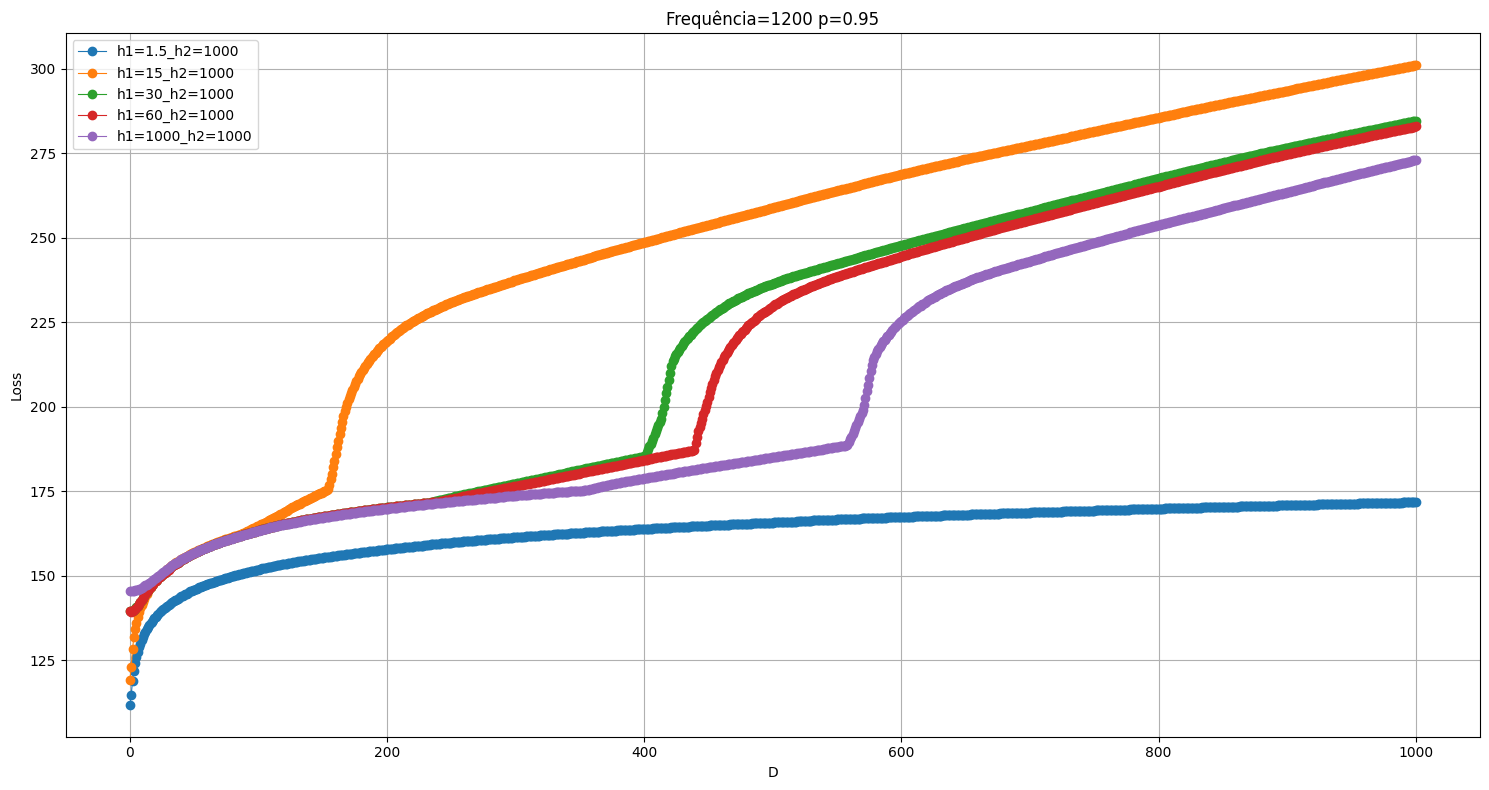

In [6]:
plt.figure(figsize=(15, 8))

# Aqui aplicamos a espessura da linha em cada coluna selecionada
for coluna in df_selecionado.columns:
    plt.plot(df_selecionado.index, df_selecionado[coluna], label=coluna, marker='o', linewidth=0.8)  # Linhas mais finas

# Personalizar o gráfico
plt.title('Frequência=1200 p=0.95')
plt.xlabel('D')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(title='')
plt.tight_layout()

# Mostrar o gráfico
plt.show()